# Concrete Material Analysis with `ConcreteEC2_2023`

This notebook provides an in-depth guide to using the `ConcreteEC2_2023` class for analyzing concrete materials according to the Eurocode 2 (EC2) 2023 standards. The class is designed to make complex concrete property calculations straightforward for both novices and experts in Python.

**Repository:** [fib International - Structural Codes](https://github.com/fib-international/structuralcodes)

**Promoter:** [fib International on GitHub](https://github.com/fib-international)

**Author:** [Daniel G. Morena](https://github.com/DanielGMorenaFhecor) - dgm@fhecor.es

In [2]:
# Adjust imports when pkgs is created
import matplotlib.pyplot as plt
import numpy as np

from structuralcodes.materials.concrete import ConcreteEC2_2023

## Working with the `ConcreteEC2_2023` Class

### Instantiating the Class
To begin using the `ConcreteEC2_2023` class for your concrete material calculations, you need to create an instance of the class. This is done by providing the necessary parameters to the class constructor.

Example of instantiation:

In [3]:
# Create an instance of ConcreteEC2_2023
std_concrete = ConcreteEC2_2023(fck=30, name='Standard Concrete', density=2400)

In this example, we've created a concrete instance with a characteristic compressive strength (`fck`) of 30 MPa, a name "Standard Concrete", and a density of 2400 kg/m³.

### Handling Multiple Instances
You might need to work with different types of concrete in your projects. You can easily create multiple instances of the `ConcreteEC2_2023` class to represent different concrete mixes.

In [4]:
# Custom concrete
custom_concrete= ConcreteEC2_2023(fck=30, name='Custom Concrete', kE=10000, strength_dev_class='rapid', gamma_C=1.4)

# High-strength concrete
high_strength_concrete = ConcreteEC2_2023(fck=50, name='High Strength Concrete')

# Lightweight concrete
lightweight_concrete = ConcreteEC2_2023(fck=25, density=1850, name='Lightweight Concrete')

# We create a list with all meterials
materials = [std_concrete, custom_concrete, high_strength_concrete, lightweight_concrete]

This allows you to compare and manage various concrete materials within your project.

### Applying Methods
Each instance of the `ConcreteEC2_2023` class comes with a set of methods that allow you to calculate specific properties or perform certain operations related to the concrete material.

For example, to get the mean compressive strength (`fcm`) of our standard concrete or all the concretes:

In [5]:
for material in materials:
    print(f'{material.name} - fcm = {material.fcm} MPa')

Standard Concrete - fcm = 38.0 MPa
Custom Concrete - fcm = 38.0 MPa
High Strength Concrete - fcm = 58.0 MPa
Lightweight Concrete - fcm = 33.0 MPa


### Simple Application: Design Strength Calculation
A common application is to calculate the design compressive strength (`fcd`) of concrete, which is crucial for structural design. This can be done using the `fcd` method of our instances.

In [6]:
# Calculate the design compressive strength for standard concrete
for material in materials:
    print(f'{material.name} - fcd = {material.fcd()} MPa')

Standard Concrete - fcd = 20.0 MPa
Custom Concrete - fcd = 21.42857142857143 MPa
High Strength Concrete - fcd = 30.943925557418527 MPa
Lightweight Concrete - fcd = 16.666666666666668 MPa


In this example, `t_ref` is the reference time in days, `t0` is the age at loading in days, and `fck_ref` is the reference compressive strength in MPa. These parameters can be adjusted based on your specific project requirements.

For example we can run the same code but with `t0` equals 50 days and `t_ref` equals 15 days:

In [7]:
t0=50 # Age loading of 50 days
t_ref=15 # Reference time of 15 days

for material in materials:
    print(f'{material.name} - fcd = {material.fcd(t_ref=15, t0=50)} MPa')

Standard Concrete - fcd = 17.0 MPa
Custom Concrete - fcd = 18.214285714285715 MPa
High Strength Concrete - fcd = 26.302336723805748 MPa
Lightweight Concrete - fcd = 14.166666666666666 MPa


### Concrete Tensile Strength (`fctm` and `fctd`)

- **Mean Tensile Strength (`fctm`)**: This method calculates the mean tensile strength of concrete, an essential property for understanding the material's behavior under tension. It's a fundamental parameter in cracking and deflection calculations.


In [8]:
for material in materials:
    print(f'{material.name} - fctm = {material.fctm:.2} MPa')

Standard Concrete - fctm = 2.9 MPa
Custom Concrete - fctm = 2.9 MPa
High Strength Concrete - fctm = 4.1 MPa
Lightweight Concrete - fctm = 2.6 MPa


- **Design Tensile Strength (`fctd`)**: Computes the design tensile strength, considering partial safety factors. It's crucial for designing elements subjected to tensile stresses.

In [9]:
for material in materials:
    print(f'{material.name} - fctd = {material.fctd()} MPa') # Default value is t_ref = 28, but we can change it.

Standard Concrete - fctd = 1.0813481107583052 MPa
Custom Concrete - fctd = 1.1585872615267556 MPa
High Strength Concrete - fctd = 1.5200738652931474 MPa
Lightweight Concrete - fctd = 0.9575865301389501 MPa


### Fractile Tensile Strengths (`fctk_5` and `fctk_95`)

- **5% Fractile Tensile Strength (`fctk_5`)**: Provides the lower 5% fractile tensile strength, useful in specific design scenarios where conservative values are required.
- **95% Fractile Tensile Strength (`fctk_95`)**: Gives the upper 95% fractile tensile strength, applicable in cases where higher confidence in tensile capacity is needed.


In [10]:
for material in materials:
    print(f'{material.name} - fctk5={material.fctk_5} MPa, fctk95={material.fctk_95} MPa')

Standard Concrete - fctk5=2.027527707671822 MPa, fctk95=3.765408599961956 MPa
Custom Concrete - fctk5=2.027527707671822 MPa, fctk95=3.765408599961956 MPa
High Strength Concrete - fctk5=2.850138497424651 MPa, fctk95=5.2931143523600666 MPa
Lightweight Concrete - fctk5=1.7954747440105314 MPa, fctk95=3.334453096019559 MPa


### Strain Characteristics (`eps_c1` and `eps_cu1`)

- **Strain at Maximum Compressive Strength (`eps_c1`)**: Returns the strain value at the maximum compressive strength, critical for nonlinear analysis and modeling of concrete behavior under compression.

- **Strain at Failure (`eps_cu1`)**: Provides the ultimate strain at concrete failure, essential for determining ductility and failure modes of concrete elements.


In [11]:
for material in materials:
    print(f'{material.name} - fctk5={material.eps_c1 * 1000} ‰, fctk95={material.eps_cu1 * 1000} ‰')

Standard Concrete - fctk5=2.353382784759274 ‰, fctk95=3.5 ‰
Custom Concrete - fctk5=2.353382784759274 ‰, fctk95=3.5 ‰
High Strength Concrete - fctk5=2.7096136484394573 ‰, fctk95=3.4431511211968964 ‰
Lightweight Concrete - fctk5=2.245274030997078 ‰, fctk95=3.5 ‰


### Plotting Strain vs. Stress

In this section, we will delve into the mechanical behavior of concrete under compression by examining the strain-stress relationship. The relationship between strain and stress in concrete is pivotal for understanding how concrete structures respond to applied loads, and it is defined by the concrete constitutive law.

The constitutive law for concrete encapsulates the material's response to stress and strain, providing a fundamental basis for structural analysis and design. By plotting the strain versus stress curves for various types of concrete, we gain insights into their respective ductilities and strengths. This information is crucial when it comes to selecting the appropriate type of concrete for specific structural applications.

We will compare the behavior of four different concrete types:
- Standard Concrete
- Custom Concrete
- Lightweight Concrete
- High-Strength Concrete

Each type will be represented by its unique stress-strain curve, derived from the concrete constitutive law defined within the `ConcreteEC2_2023` class. The strains will range from 0 up to the ultimate strain at failure (\( \varepsilon_{cu1} \)), allowing us to observe the full spectrum of each concrete's compressive behavior.

The following code section will generate these plots, illustrating the nuanced differences in mechanical properties across different concrete formulations.

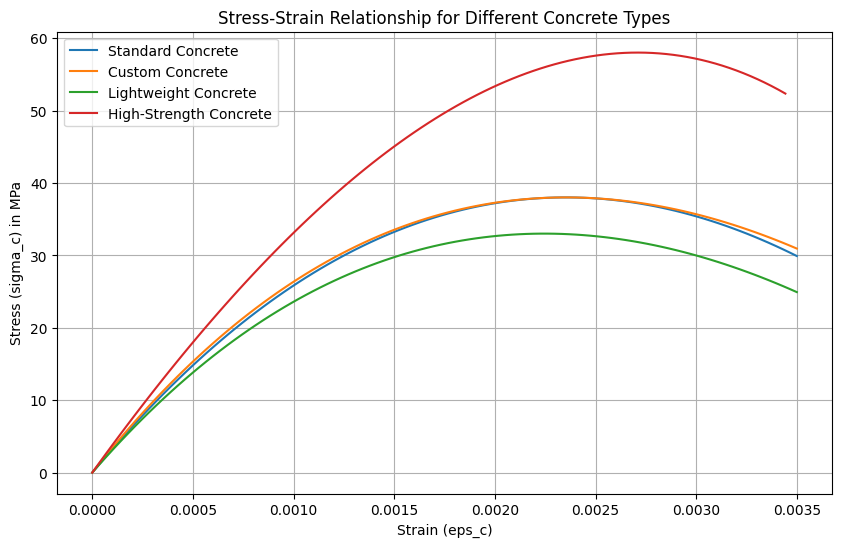

In [12]:
# Define strain ranges for each concrete type up to its failure strain
strain_ranges = {
    "Standard Concrete": np.linspace(0, std_concrete.eps_cu1, 100),
    "Custom Concrete": np.linspace(0, custom_concrete.eps_cu1, 100),
    "Lightweight Concrete": np.linspace(0, lightweight_concrete.eps_cu1, 100),
    "High-Strength Concrete": np.linspace(0, high_strength_concrete.eps_cu1, 100)
}

plt.figure(figsize=(10, 6))

# Iterate over each concrete type, calculate stress for each strain value, and plot the curve
for concrete_type, strains in strain_ranges.items():
    stresses = []
    for strain in strains:
        if concrete_type == "Standard Concrete":
            stresses.append(std_concrete.sigma_c(eps_c=strain))
        elif concrete_type == "Custom Concrete":
            stresses.append(custom_concrete.sigma_c(eps_c=strain))
        elif concrete_type == "Lightweight Concrete":
            stresses.append(lightweight_concrete.sigma_c(eps_c=strain))
        elif concrete_type == "High-Strength Concrete":
            stresses.append(high_strength_concrete.sigma_c(eps_c=strain))

    plt.plot(strains, stresses, label=concrete_type)

plt.title('Stress-Strain Relationship for Different Concrete Types')
plt.xlabel('Strain (eps_c)')
plt.ylabel('Stress (sigma_c) in MPa')
plt.legend()
plt.grid(True)
plt.show()

### Customizing Concrete Properties: `fcm`, `fctm`, and `Ecm`

In practical engineering applications, it might be necessary to work with concrete properties that differ from standard values. The `ConcreteEC2_2023` class provides flexibility by allowing users to set custom values for the mean compressive strength (`fcm`), the mean tensile strength (`fctm`), and the secant modulus of elasticity (`Ecm`). This feature can be particularly useful when dealing with concrete that has been tested to have specific characteristics or when adhering to particular design requirements.

#### Setting the Mean Compressive Strength (`fcm`)

The mean compressive strength, `fcm`, represents the average strength of concrete and is crucial for various calculations in concrete design. To set a custom value for `fcm`:

In [13]:
std_concrete.fcm = 35  # Set the mean compressive strength to 35 MPa
std_concrete.fctm = 3.2  # Set the mean compressive strength to 35 MPa
std_concrete.Ecm = 30000  # Set the secant modulus of elasticity to 30,000 MPa
print(f'{std_concrete.name} - fcm = {std_concrete.fcm} MPa')
print(f'{std_concrete.name} - fctm = {std_concrete.fctm} MPa')
print(f'{std_concrete.name} - Ecm = {std_concrete.Ecm} MPa')

Standard Concrete - fcm = 35 MPa
Standard Concrete - fctm = 3.2 MPa
Standard Concrete - Ecm = 30000 MPa


### Impact of Overriding `fck` on Concrete Properties

The characteristic compressive strength (`fck`) is a fundamental property of concrete, serving as the baseline for computing various other attributes. In the `ConcreteEC2_2023` class, altering the `fck` value triggers a re-computation of the concrete's properties, ensuring that all related attributes reflect the new `fck`. This behavior is due to the internal `_reset_attributes` method, which is called whenever `fck` is updated.

#### Demonstration

Let's demonstrate this behavior by first creating a concrete instance, displaying some of its properties, then changing `fck` and showing how the properties are affected.

First, we instantiate a concrete object:

In [14]:
initial_concrete = ConcreteEC2_2023(fck=30)  # Initial characteristic compressive strength of 30 MPa

Next, we print out the initial values for `fcm`, `fctm`, and `Ecm`:

In [15]:
print("Initial Properties:")
print(f"Mean Compressive Strength (fcm): {initial_concrete.fcm} MPa")
print(f"Mean Tensile Strength (fctm): {initial_concrete.fctm} MPa")
print(f"Secant Modulus of Elasticity (Ecm): {initial_concrete.Ecm} MPa")

Initial Properties:
Mean Compressive Strength (fcm): 38.0 MPa
Mean Tensile Strength (fctm): 2.896468153816889 MPa
Secant Modulus of Elasticity (Ecm): 31938.76636459015 MPa


Now, let's override `fck` and observe the changes:

In [16]:
initial_concrete.fck = 40  # Update the characteristic compressive strength to 40 MPa

Finally, we print out the properties again to see how they have been recalculated based on the new `fck`:

In [17]:
print("Updated Properties:")
print(f"Mean Compressive Strength (fcm): {initial_concrete.fcm} MPa")
print(f"Mean Tensile Strength (fctm): {initial_concrete.fctm} MPa")
print(f"Secant Modulus of Elasticity (Ecm): {initial_concrete.Ecm} MPa")

Updated Properties:
Mean Compressive Strength (fcm): 48.0 MPa
Mean Tensile Strength (fctm): 3.5088212858554386 MPa
Secant Modulus of Elasticity (Ecm): 34525.29126381065 MPa


This example illustrates how changing the `fck` value of a concrete instance leads to a re-evaluation of its derived properties. This mechanism ensures that the concrete's behavior and characteristics remain consistent with its fundamental compressive strength, providing a reliable basis for engineering analyses and designs.